## 📘 Open the Notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nishani53/Khanal_MSc_Thesis_MSU/blob/main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Khanal_MSU_project_competition_hotspots_1980s-2020s.ipynb)


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu

# 🌲 Competition Hotspot for Forest Products in Michigan (1980s–2020s)

This Python-based spatial analysis identifies **market competition hotspots** for forest products across **Michigan** from the **1980s through the 2020s**. Using **existing road networks** and **haul time as a proxy for cost**, the model visualizes competitive intensity among mills for various forest products across five decades.

---

## 📌 Overview

The analysis covers the following **forest product categories**:

- 🌳 **Hardwood Sawlogs**
- 🌲 **Softwood Sawlogs**
- 🧻 **Pulpwood**
- 🔥 **Wood Biomass**

Each product's competition is mapped using haul-distance thresholds, helping reveal areas where feedstock from forests faces varying levels of market access and pressure over time.

---

## 🏁 Competition Levels Explained

The model assigns a **competition level (1 to 5)** based on overlapping mill haul zones and market density:

| Level | Description |
|-------|-------------|
| 🟦 **Level 1** | **Very Low Competition** – Few or no nearby mills; limited market options (low merchantability). |
| 🟩 **Level 2** | **Low Competition** – Minimal overlap in haul zones; limited competition for feedstock. |
| 🟨 **Level 3** | **Moderate Competition** – Some competition; feedstock has a few potential buyers. |
| 🟧 **Level 4** | **High Competition** – Multiple mills overlap; significant buyer presence. |
| 🟥 **Level 5** | **Very High Competition (Hotspot)** – Strong market competition; high merchantability and pressure on local resources. |

> 🎯 **Hotspot zones** (Level 5) indicate the most economically valuable — and most contested — areas for sourcing forest products.

---

## 🗓️ Time Series Coverage

This project visualizes **decadal competition maps** for Michigan’s forest products, covering:

- 📼 **1980s**
- 📀 **1990s**
- 💾 **2000s**
- 💻 **2010s**
- 📱 **2020s**

Each map highlights spatial shifts in market accessibility and competition pressure.

---

## 🛣️ Methodology

- GIS shapefiles represent mill market zones for each decade.
- Haul time is calculated from road networks as a cost proxy.
- Zones are ranked and classified into competition levels.
- Tools used include: **Python**, **GeoPandas**, **NetworkX**, **OSMnx**, and **rasterio**.

---

## 📊 Use Cases

- Strategic siting of new forest product facilities  
- Identifying underserved or over-saturated markets  
- Forest resource sustainability & long-term planning  
- Competitive benchmarking for policy and industry decisions

---

## 🚀 Getting Started

1. Clone this repository  
2. Install dependencies listed in `requirements.txt`  
3. Update shapefile paths in the script(s)  
4. Run the Python scripts for each forest product and decade  

---

## 📘 Focused Workflow: Competition Hotspots for 2023

Although the full project spans five decades, a **detailed, high-resolution analysis was performed for the year 2023**, including:

- Creating haul-time buffers around mills based on current road networks  
- Mapping individual competition zones by forest product  
- Assigning grid-based competition scores from mill overlap  
- Merging competition zones across products  
- Classifying competition levels (1–5) for final hotspot maps  

This 2023-specific workflow serves as a benchmark for comparison and forms the core reference layer for **market change assessments** across decades.

---

## 📧 Contact

For access to data or high-resolution maps from any decade, please contact:

**Naresh Khanal**  
✉️ [khanalna@msu.edu](mailto:khanalna@msu.edu)

---

## 📎 License

This project is intended for academic and research use only.  
Please reach out for collaboration, permissions, or redistribution.


**Download the necessary Libraries**

In [16]:
!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar


In [18]:
# Clean up any previously unzipped or nested folders
%cd /content
!rm -rf Khanal_MSc_Thesis_MSU-main repo.zip

# Download the main GitHub repo as ZIP
!curl -L -o repo.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -q repo.zip

# Go to the data directory inside the correct project folder
%cd Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Data

# Unzip the Competition Hotspots Data
!unzip -q "Competition Hotspots Data.zip"

# Go back up to the notebook directory
%cd ..

# ✅ Define base path to use in your scripts
base_path = "Data/Competition Hotspots Data"


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22.5M    0 22.5M    0     0  13.4M      0 --:--:--  0:00:01 --:--:-- 17.7M
/content/Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Data
/content/Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s


# Biomass

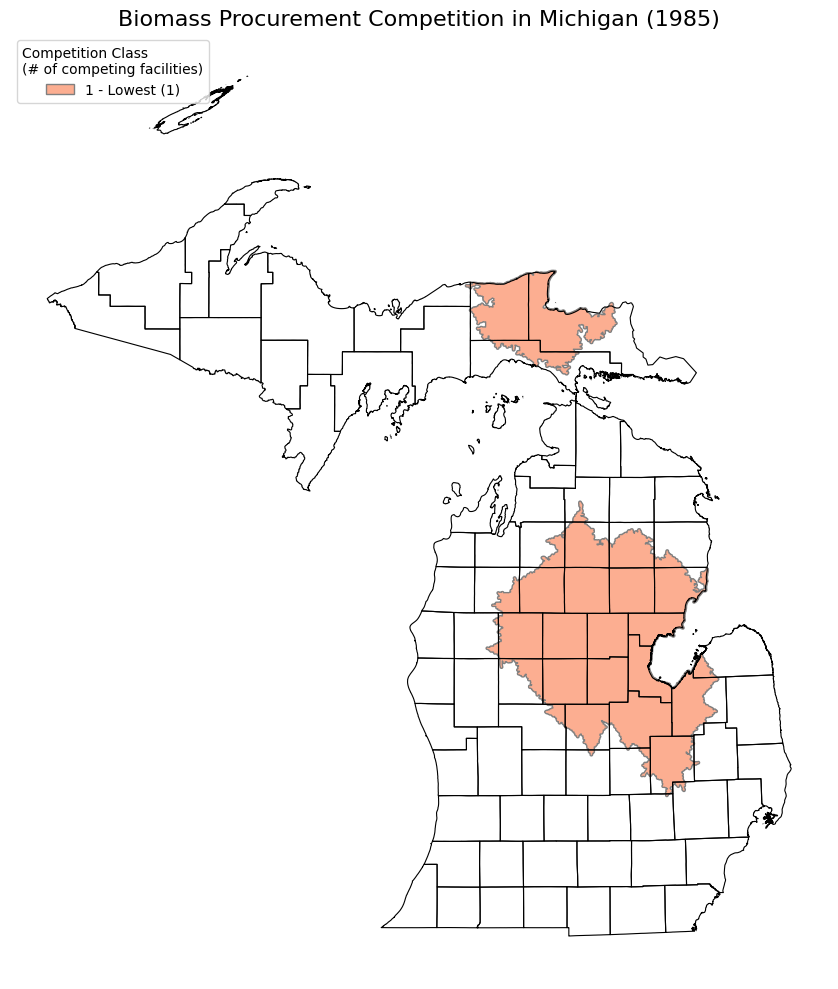

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
bio1985_fp  = "Data/Competition Hotspots Data/Biomass_1985.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_bio1985  = gpd.read_file(bio1985_fp)

# --- Reproject to match CRS ---
if gdf_bio1985.crs != gdf_michigan.crs:
    gdf_bio1985 = gdf_bio1985.to_crs(gdf_michigan.crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Single class: "Lowest"
gdf_bio1985.plot(ax=ax, color='#fcae91', edgecolor='grey')  # Light Coral

# --- Legend ---
legend_elements = [
    Patch(facecolor='#fcae91', edgecolor='grey', label='1 - Lowest (1)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)
plt.title("Biomass Procurement Competition in Michigan (1985)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


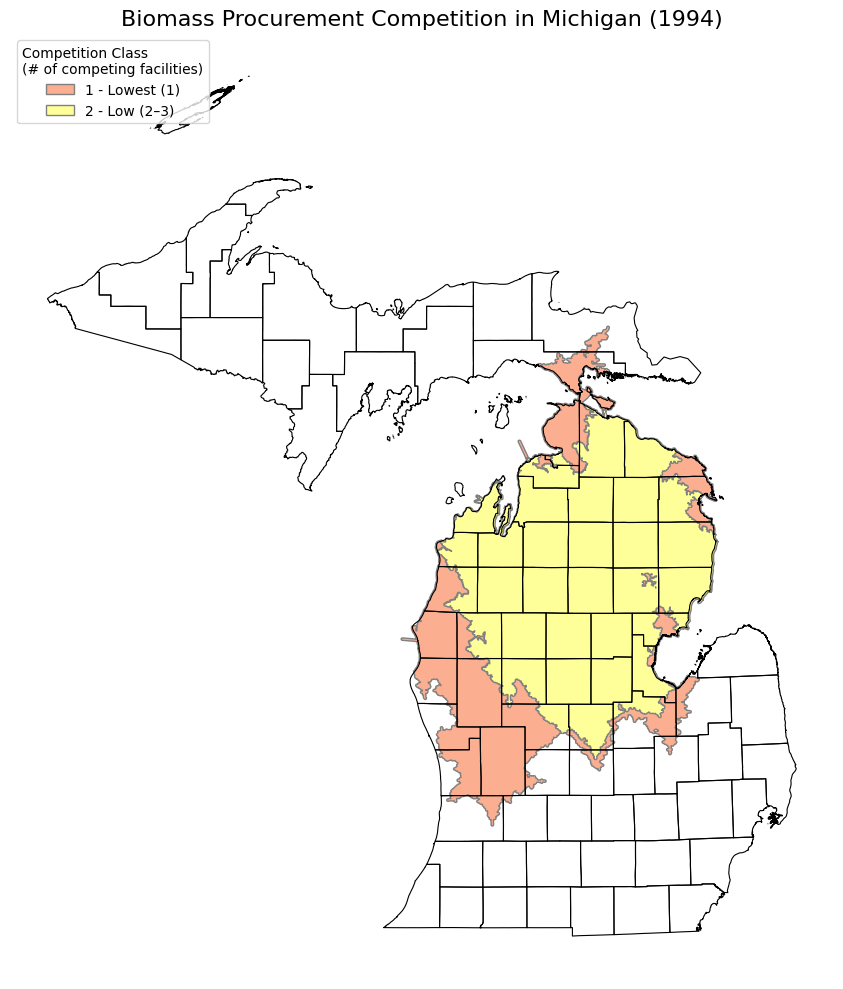

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
bio1994_fp  = "Data/Competition Hotspots Data/biomass_1994.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_bio1994  = gpd.read_file(bio1994_fp)

# --- Reproject to match CRS ---
if gdf_bio1994.crs != gdf_michigan.crs:
    gdf_bio1994 = gdf_bio1994.to_crs(gdf_michigan.crs)

# --- Color map ---
color_map = {
    1: '#fcae91',  # Lowest (Light Coral)
    2: '#ffff99'   # Low (Light Yellow)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

for level, color in color_map.items():
    gdf_bio1994[gdf_bio1994['gridcode'] == level].plot(ax=ax, color=color, edgecolor='grey')

# --- Legend ---
legend_elements = [
    Patch(facecolor='#fcae91', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)
plt.title("Biomass Procurement Competition in Michigan (1994)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


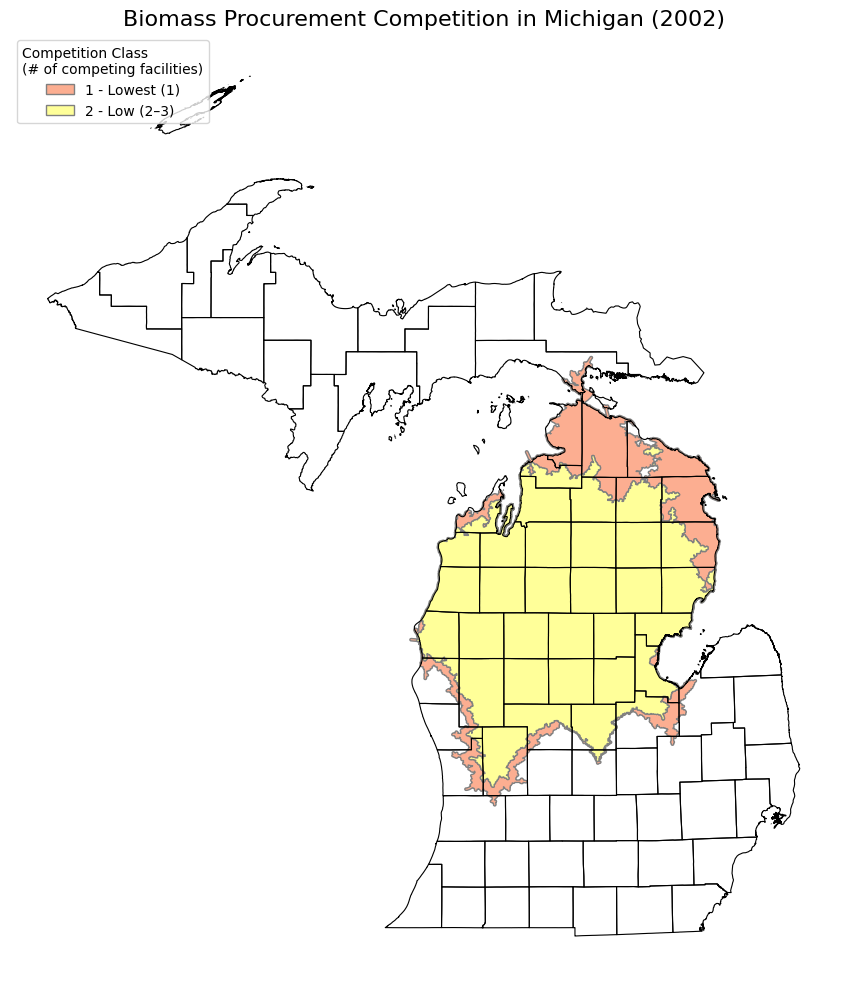

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
bio2002_fp  = "Data/Competition Hotspots Data/biomass_2002.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_bio2002  = gpd.read_file(bio2002_fp)

# --- Reproject to match CRS ---
if gdf_bio2002.crs != gdf_michigan.crs:
    gdf_bio2002 = gdf_bio2002.to_crs(gdf_michigan.crs)

# --- Color map for the two competition levels ---
color_map = {
    1: '#fcae91',  # Light Coral for "Lowest"
    2: '#ffff99'   # Light Yellow for "Low"
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
for level, color in color_map.items():
    gdf_bio2002[gdf_bio2002['gridcode'] == level].plot(ax=ax, color=color, edgecolor='grey')

# --- Legend ---
legend_elements = [
    Patch(facecolor='#fcae91', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Biomass Procurement Competition in Michigan (2002)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


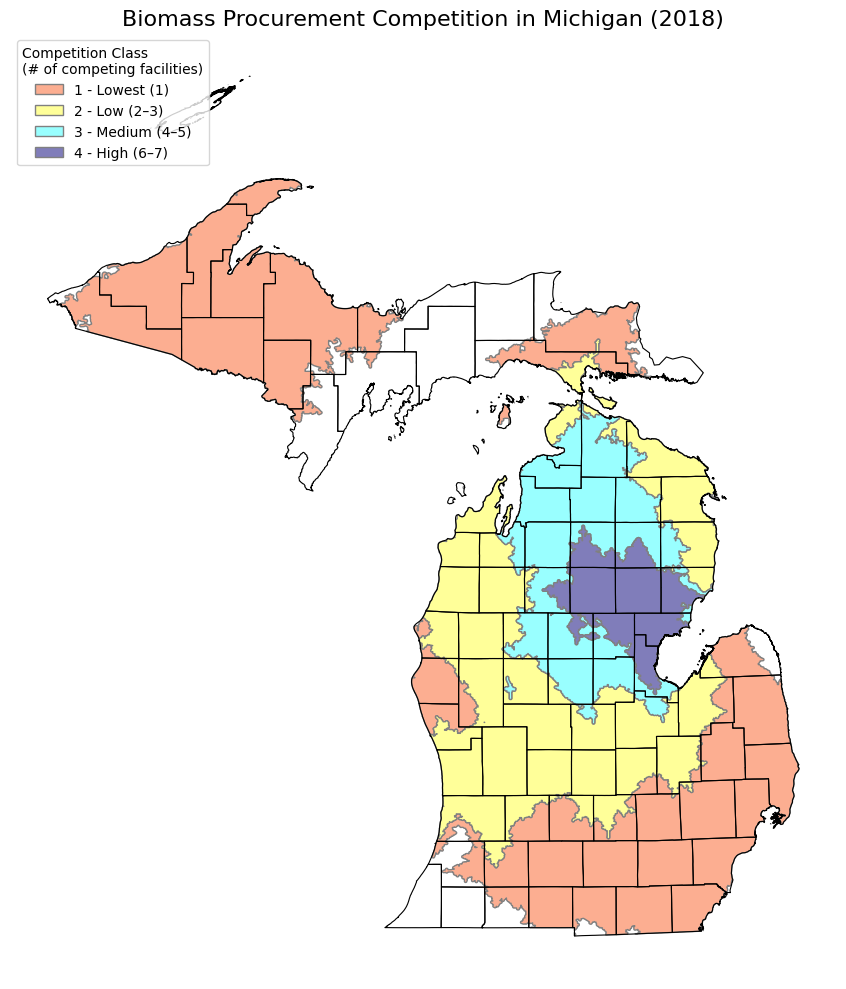

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
bio2018_fp = "Data/Competition Hotspots Data/biomass_2018.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_bio2018 = gpd.read_file(bio2018_fp)

# --- Reproject to match CRS ---
if gdf_bio2018.crs != gdf_michigan.crs:
    gdf_bio2018 = gdf_bio2018.to_crs(gdf_michigan.crs)

# --- Color mapping based on legend image ---
color_map = {
    1: '#fcae91',  # Light Coral (1 - Lowest)
    2: '#ffff99',  # Light Yellow (2 - Low)
    3: '#99ffff',  # Cyan (3 - Medium)
    4: '#807dba'   # Purple (4 - High)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each class using color_map
for level, color in color_map.items():
    gdf_bio2018[gdf_bio2018['gridcode'] == level].plot(ax=ax, color=color, edgecolor='grey')

# --- Legend ---
legend_elements = [
    Patch(facecolor='#fcae91', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)'),
    Patch(facecolor='#99ffff', edgecolor='grey', label='3 - Medium (4–5)'),
    Patch(facecolor='#807dba', edgecolor='grey', label='4 - High (6–7)')
]
ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Biomass Procurement Competition in Michigan (2018)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


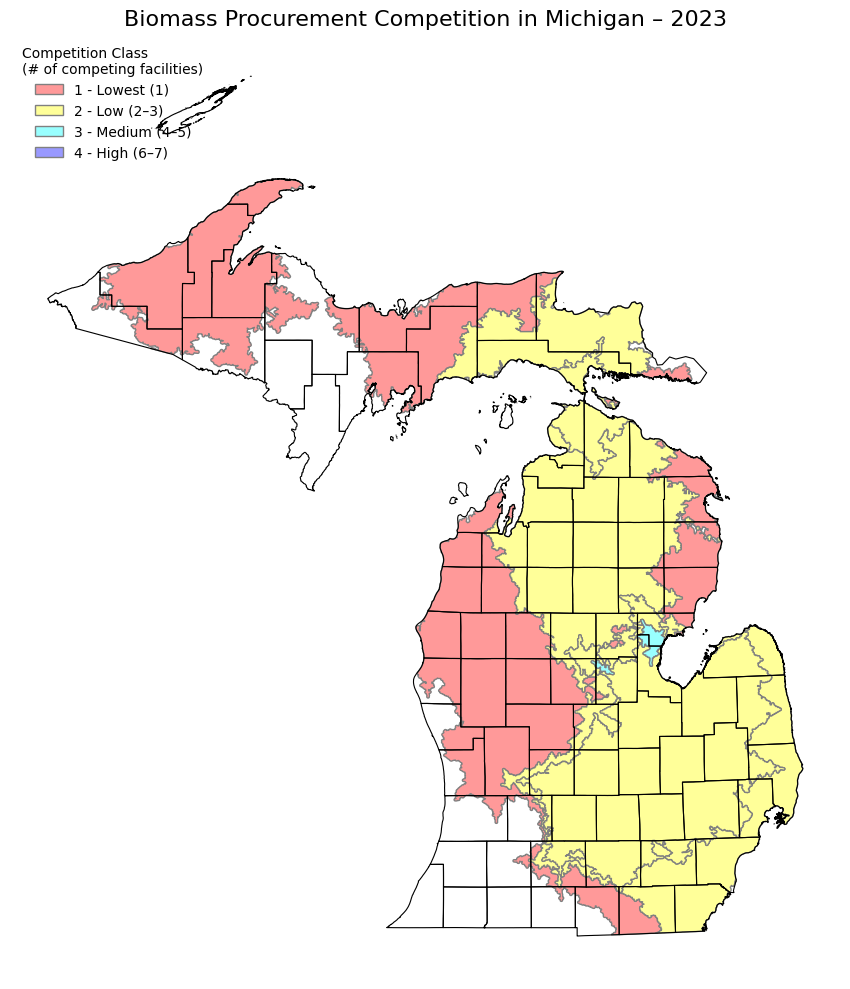

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
lowest_fp   = "Data/Competition Hotspots Data/biomass_2023_lowest.shp"
low_fp      = "Data/Competition Hotspots Data/biomass_2023_low.shp"
medium_fp   = "Data/Competition Hotspots Data/biomass_2023_medium.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)

# --- Ensure same CRS ---
common_crs = gdf_michigan.crs
gdf_lowest = gdf_lowest.to_crs(common_crs)
gdf_low    = gdf_low.to_crs(common_crs)
gdf_medium = gdf_medium.to_crs(common_crs)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# --- Plot competition zones ---
gdf_lowest.plot(ax=ax, color='#ff9999', edgecolor='grey')   # Level 1 - pink/red
gdf_low.plot(ax=ax, color='#ffff99', edgecolor='grey')      # Level 2–3 - yellow
gdf_medium.plot(ax=ax, color='#99ffff', edgecolor='grey')   # Level 4–5 - cyan

# --- Custom legend ---
legend_elements = [
    Patch(facecolor='#ff9999', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#ffff99', edgecolor='grey', label='2 - Low (2–3)'),
    Patch(facecolor='#99ffff', edgecolor='grey', label='3 - Medium (4–5)'),
    Patch(facecolor='#9999ff', edgecolor='grey', label='4 - High (6–7)')  # Placeholder
]

ax.legend(
    handles=legend_elements,
    title='Competition Class\n(# of competing facilities)',
    loc='upper left',
    frameon=False
)

# --- Final layout ---
plt.title("Biomass Procurement Competition in Michigan – 2023", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


# Hardwood Sawlogs

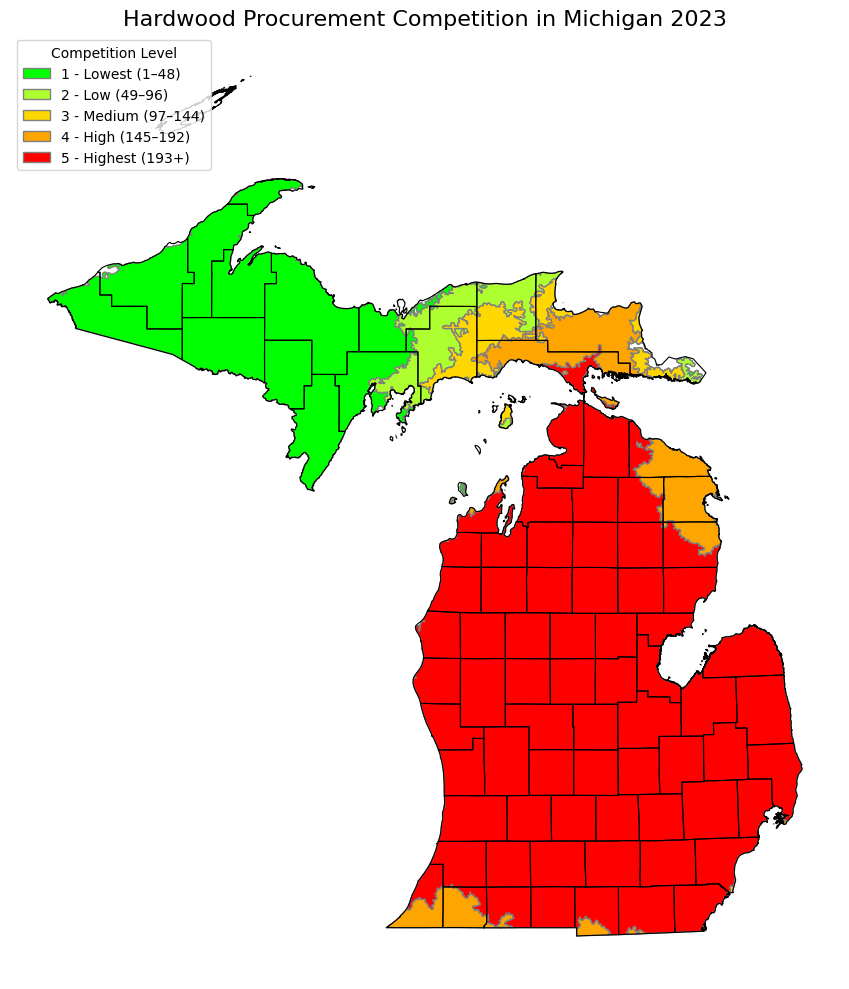

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
lowest_fp   = "Data/Competition Hotspots Data/hardwood_2023_lowest.shp"
low_fp      = "Data/Competition Hotspots Data/hardwood_2023_low.shp"
medium_fp   = "Data/Competition Hotspots Data/hardwood_2023_medium.shp"
high_fp     = "Data/Competition Hotspots Data/hardwood_2023_high.shp"
highest_fp  = "Data/Competition Hotspots Data/hardwood_2023_highest.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)
gdf_high     = gpd.read_file(high_fp)
gdf_highest  = gpd.read_file(highest_fp)

# --- Reproject to match base map CRS ---
common_crs = gdf_michigan.crs
layers = [gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest]
layers = [gdf.to_crs(common_crs) for gdf in layers]
gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest = layers

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
gdf_lowest.plot(ax=ax, color='#00FF00', edgecolor='grey')   # Bright green
gdf_low.plot(ax=ax, color='#ADFF2F', edgecolor='grey')      # Chartreuse
gdf_medium.plot(ax=ax, color='#FFD700', edgecolor='grey')   # Gold
gdf_high.plot(ax=ax, color='#FFA500', edgecolor='grey')     # Orange
gdf_highest.plot(ax=ax, color='#FF0000', edgecolor='grey')  # Red

# --- Legend ---
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest (1–48)'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low (49–96)'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium (97–144)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High (145–192)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (193+)')
]
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Hardwood Procurement Competition in Michigan 2023", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


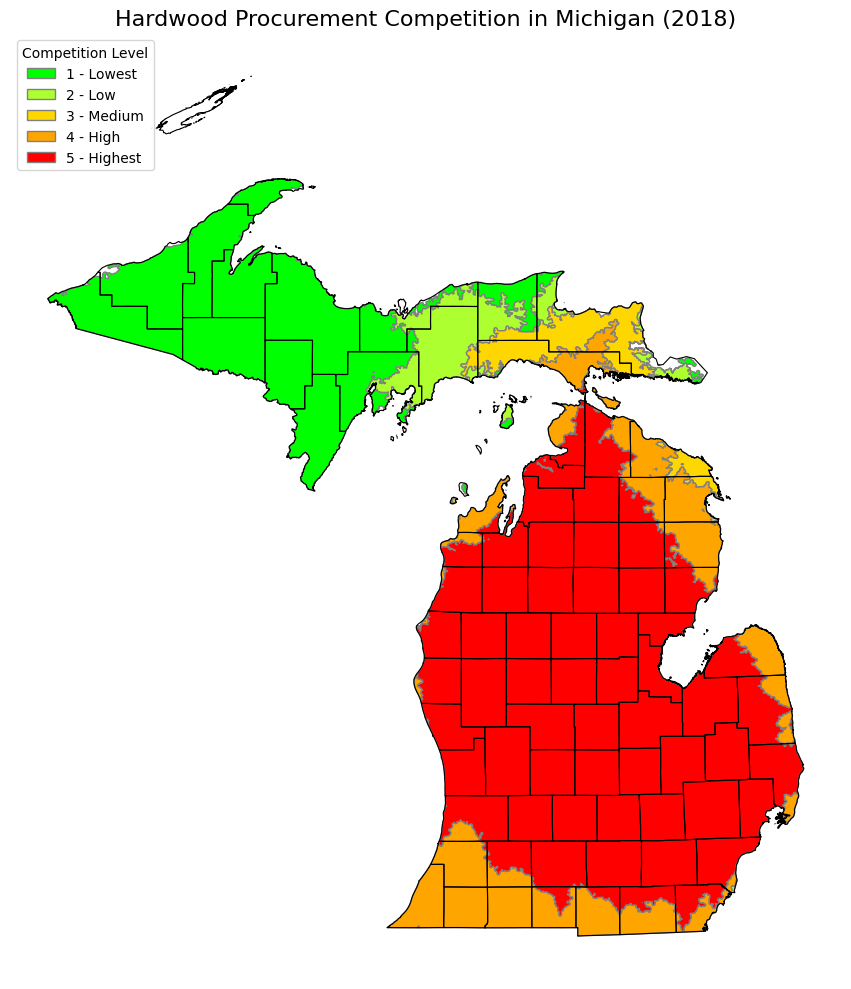

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
hard2018_fp = "Data/Competition Hotspots Data/hardwood_2018.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_2018 = gpd.read_file(hard2018_fp)

# --- Reproject if needed ---
if gdf_2018.crs != gdf_michigan.crs:
    gdf_2018 = gdf_2018.to_crs(gdf_michigan.crs)

# --- Define colors for each gridcode class ---
color_map = {
    1: '#00FF00',   # Bright green
    2: '#ADFF2F',   # Chartreuse
    3: '#FFD700',   # Gold
    4: '#FFA500',   # Orange
    5: '#FF0000'    # Red
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level by filtering on gridcode
for level, color in color_map.items():
    subset = gdf_2018[gdf_2018['gridcode'] == level]
    subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Hardwood Procurement Competition in Michigan (2018)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


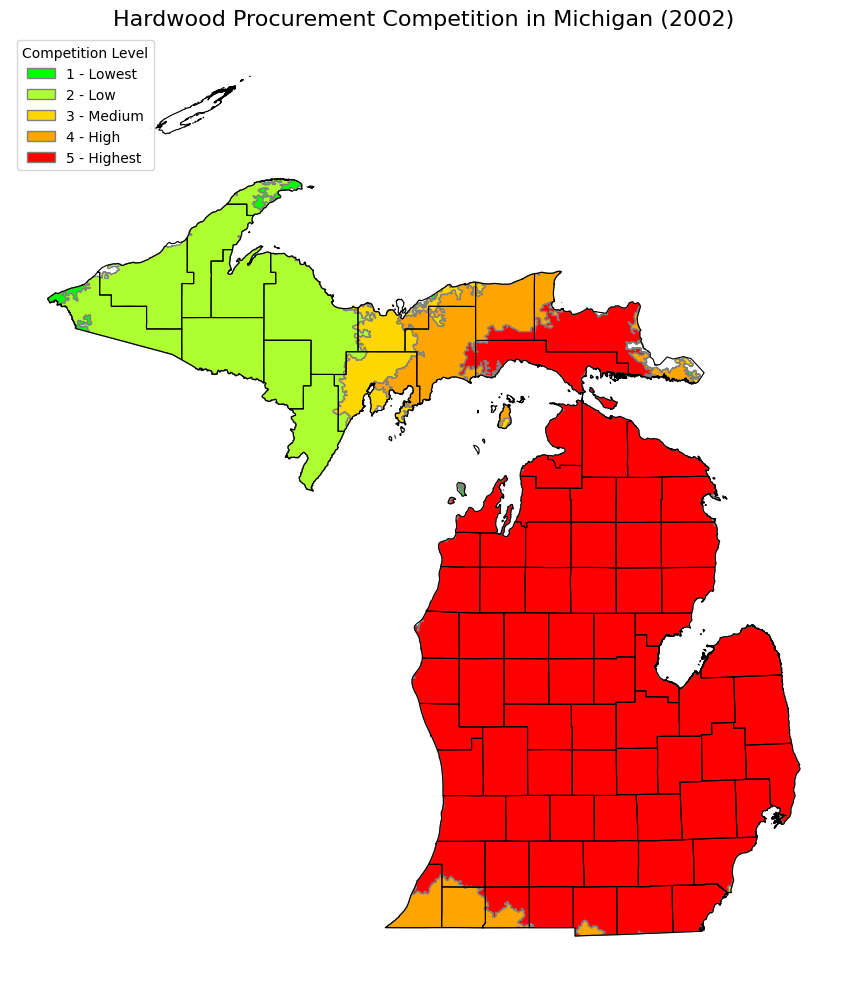

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
hard2002_fp = "Data/Competition Hotspots Data/hardwood_2002.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_2002 = gpd.read_file(hard2002_fp)

# --- Reproject if needed ---
if gdf_2002.crs != gdf_michigan.crs:
    gdf_2002 = gdf_2002.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#00FF00',   # Bright green
    2: '#ADFF2F',   # Chartreuse
    3: '#FFD700',   # Gold
    4: '#FFA500',   # Orange
    5: '#FF0000'    # Red
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_2002[gdf_2002['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Hardwood Procurement Competition in Michigan (2002)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


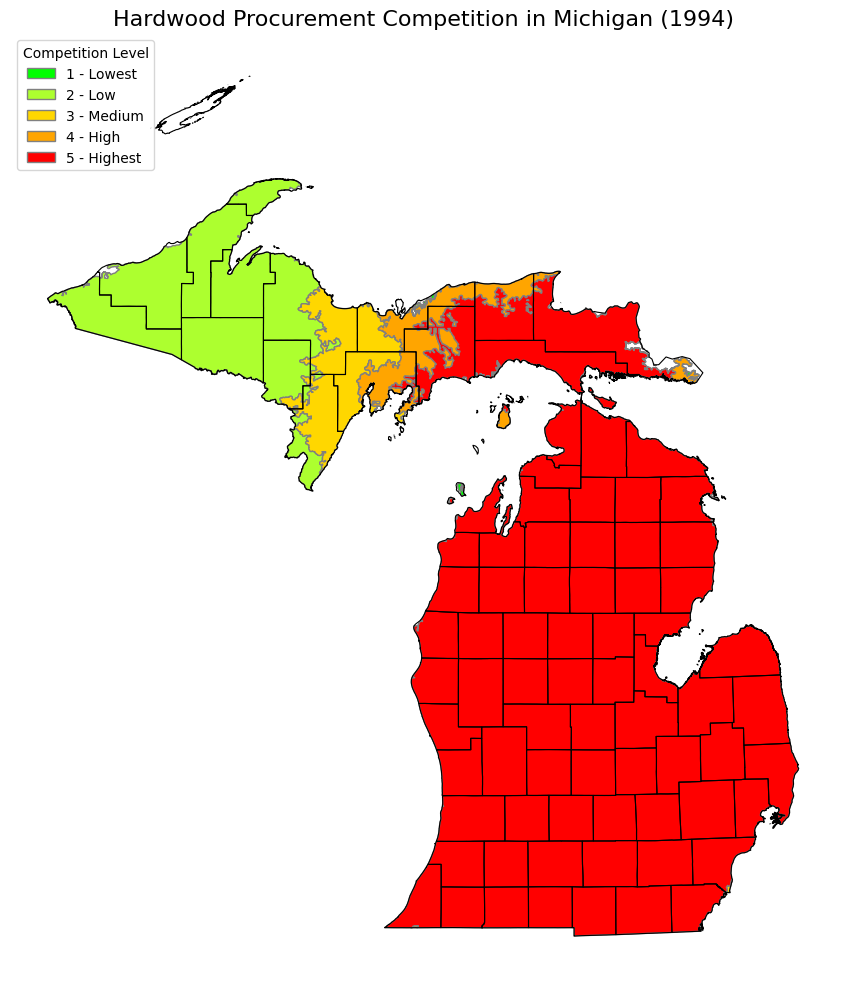

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
hard1994_fp = "Data/Competition Hotspots Data/hardwood_1994.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_1994 = gpd.read_file(hard1994_fp)

# --- Reproject if needed ---
if gdf_1994.crs != gdf_michigan.crs:
    gdf_1994 = gdf_1994.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#00FF00',   # Bright green
    2: '#ADFF2F',   # Chartreuse
    3: '#FFD700',   # Gold
    4: '#FFA500',   # Orange
    5: '#FF0000'    # Red
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_1994[gdf_1994['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Hardwood Procurement Competition in Michigan (1994)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


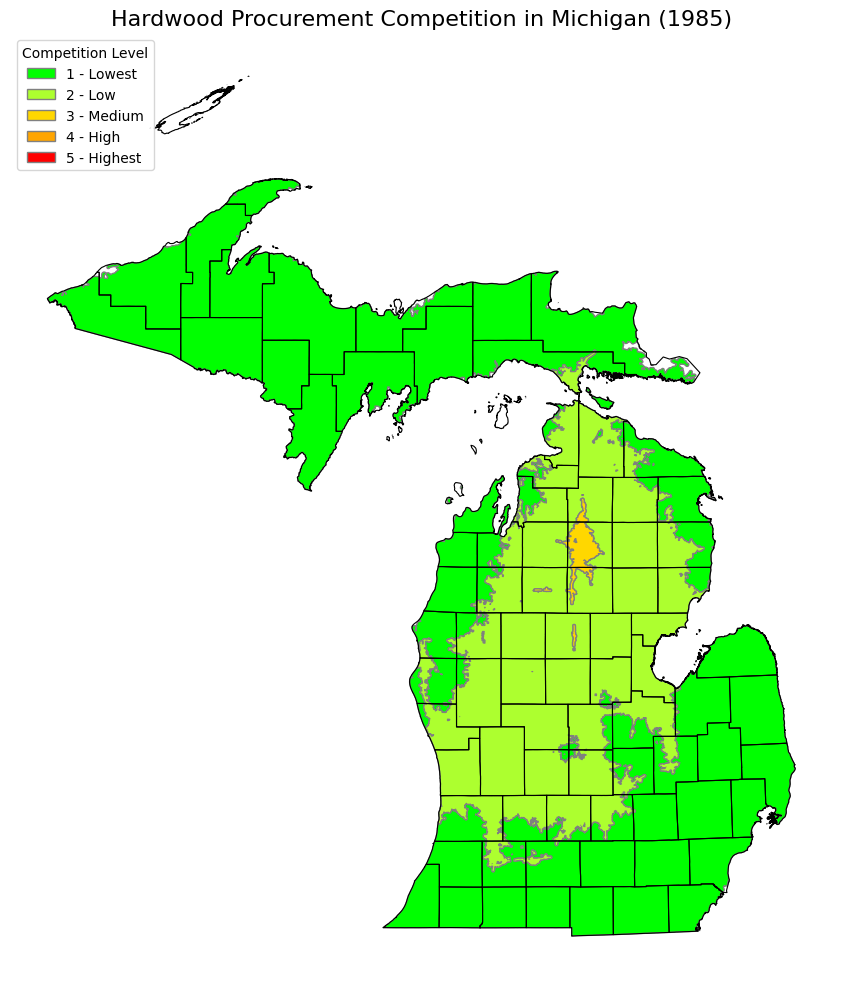

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
hard1985_fp = "Data/Competition Hotspots Data/hardwood_1985.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_1985 = gpd.read_file(hard1985_fp)

# --- Reproject if needed ---
if gdf_1985.crs != gdf_michigan.crs:
    gdf_1985 = gdf_1985.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#00FF00',   # Bright green
    2: '#ADFF2F',   # Chartreuse
    3: '#FFD700',   # Gold
    4: '#FFA500',   # Orange
    5: '#FF0000'    # Red
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_1985[gdf_1985['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#00FF00', edgecolor='grey', label='1 - Lowest'),
    Patch(facecolor='#ADFF2F', edgecolor='grey', label='2 - Low'),
    Patch(facecolor='#FFD700', edgecolor='grey', label='3 - Medium'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='4 - High'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Hardwood Procurement Competition in Michigan (1985)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


# Softwood Sawlogs

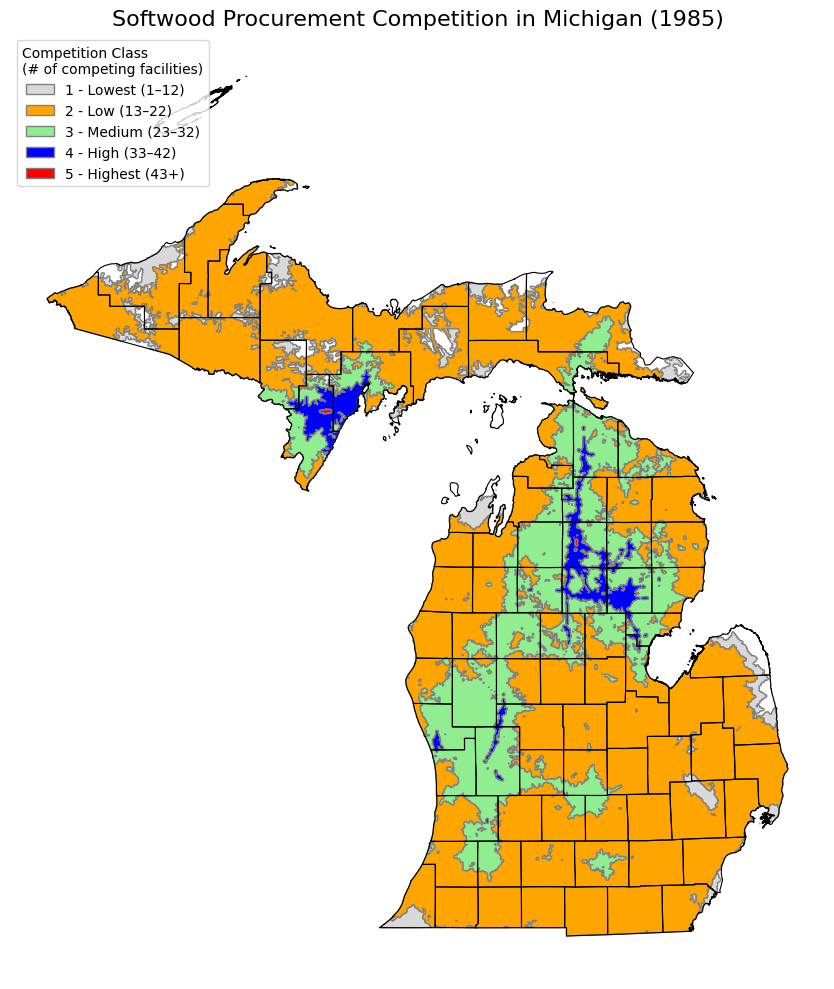

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
soft1985_fp = "Data/Competition Hotspots Data/softwood_1985.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_1985 = gpd.read_file(soft1985_fp)

# --- Reproject if needed ---
if gdf_1985.crs != gdf_michigan.crs:
    gdf_1985 = gdf_1985.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#D9D9D9',   # Gray (Lowest)
    2: '#FFA500',   # Orange (Low)
    3: '#90EE90',   # Light Green (Medium)
    4: '#0000FF',   # Blue (High)
    5: '#FF0000'    # Red (Highest)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_1985[gdf_1985['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Softwood Procurement Competition in Michigan (1985)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


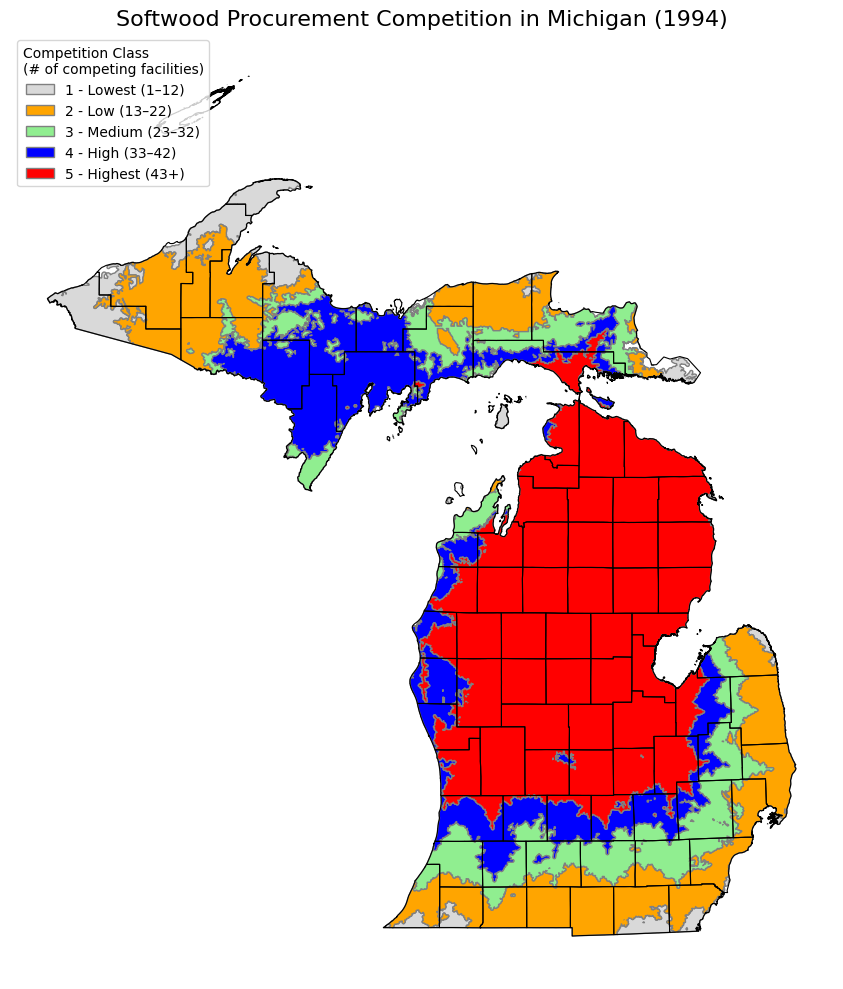

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
soft1994_fp = "Data/Competition Hotspots Data/softwood_1994.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_1994 = gpd.read_file(soft1994_fp)

# --- Reproject if needed ---
if gdf_1994.crs != gdf_michigan.crs:
    gdf_1994 = gdf_1994.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#D9D9D9',   # Gray (Lowest)
    2: '#FFA500',   # Orange (Low)
    3: '#90EE90',   # Light Green (Medium)
    4: '#0000FF',   # Blue (High)
    5: '#FF0000'    # Red (Highest)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_1994[gdf_1994['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Softwood Procurement Competition in Michigan (1994)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


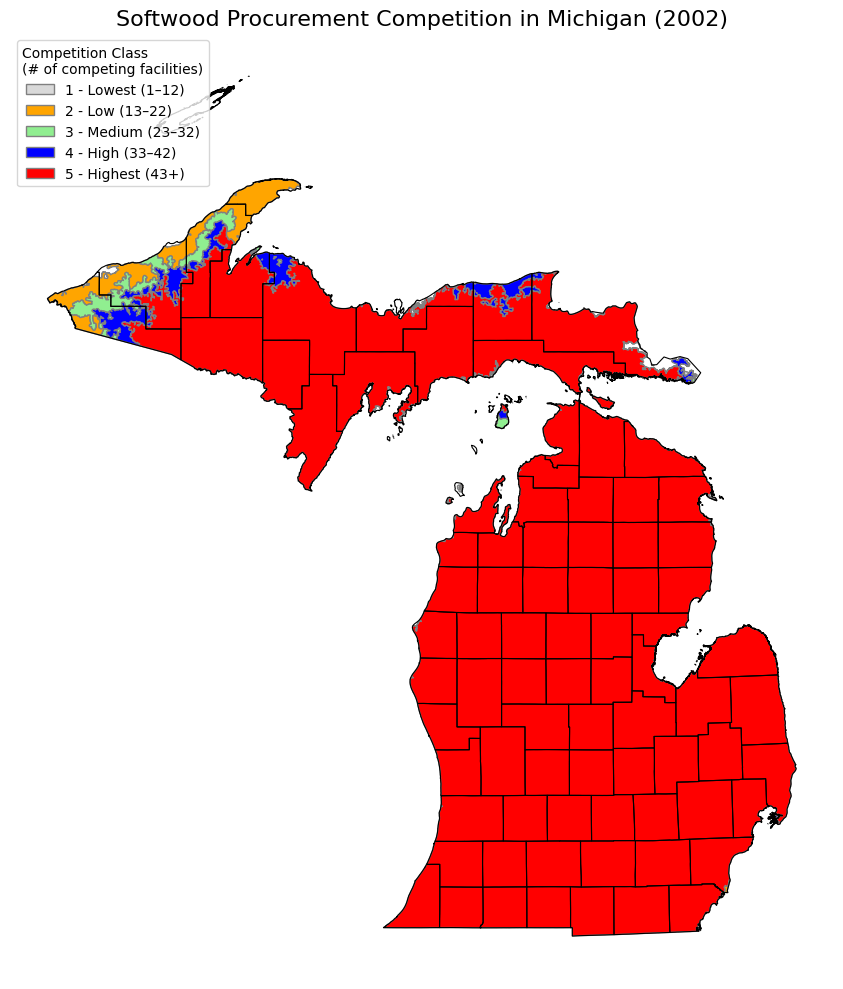

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
soft2002_fp = "Data/Competition Hotspots Data/softwood_2002.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_2002 = gpd.read_file(soft2002_fp)

# --- Reproject if needed ---
if gdf_2002.crs != gdf_michigan.crs:
    gdf_2002 = gdf_2002.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#D9D9D9',   # Gray (Lowest)
    2: '#FFA500',   # Orange (Low)
    3: '#90EE90',   # Light Green (Medium)
    4: '#0000FF',   # Blue (High)
    5: '#FF0000'    # Red (Highest)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_2002[gdf_2002['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Softwood Procurement Competition in Michigan (2002)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


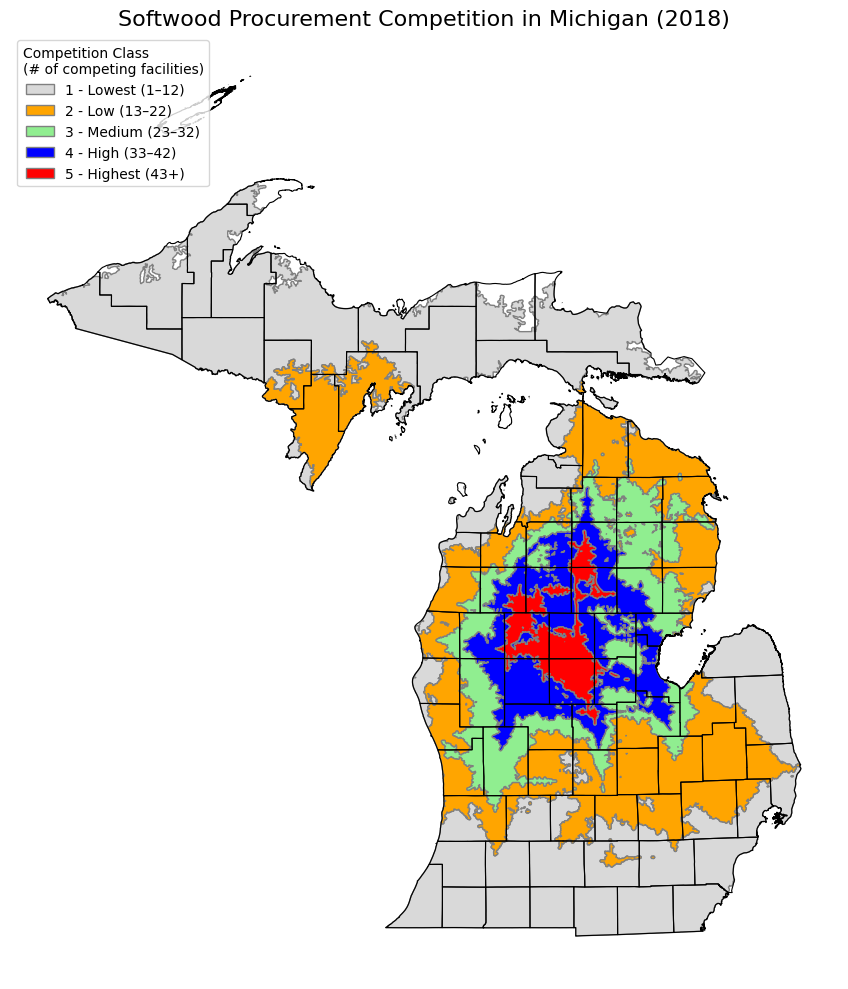

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
soft2018_fp = "Data/Competition Hotspots Data/softwood_2018.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_2018 = gpd.read_file(soft2018_fp)

# --- Reproject if needed ---
if gdf_2018.crs != gdf_michigan.crs:
    gdf_2018 = gdf_2018.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#D9D9D9',   # Gray (Lowest)
    2: '#FFA500',   # Orange (Low)
    3: '#90EE90',   # Light Green (Medium)
    4: '#0000FF',   # Blue (High)
    5: '#FF0000'    # Red (Highest)
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_2018[gdf_2018['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

ax.legend(handles=legend_elements, title="Competition Class\n(# of competing facilities)", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Softwood Procurement Competition in Michigan (2018)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


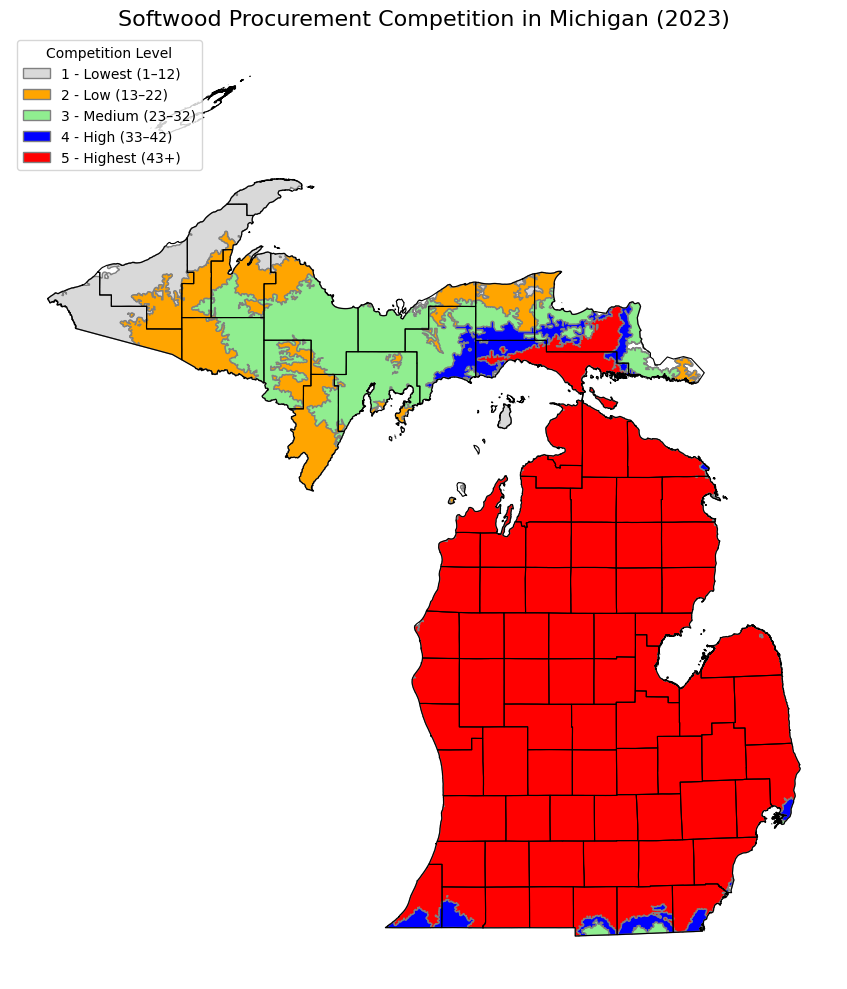

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"

lowest_fp  = "Data/Competition Hotspots Data/softwood_2023_competition_lowest.shp"
low_fp     = "Data/Competition Hotspots Data/softwood_2023_competition_low.shp"
medium_fp  = "Data/Competition Hotspots Data/softwood_2023_competition_medium.shp"
high_fp    = "Data/Competition Hotspots Data/softwood_2023_competition_high.shp"
highest_fp = "Data/Competition Hotspots Data/softwood_2023_competition_highest.shp"



# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest   = gpd.read_file(lowest_fp)
gdf_low      = gpd.read_file(low_fp)
gdf_medium   = gpd.read_file(medium_fp)
gdf_high     = gpd.read_file(high_fp)
gdf_highest  = gpd.read_file(highest_fp)

# --- Reproject to match base map CRS ---
common_crs = gdf_michigan.crs
layers = [gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest]
layers = [gdf.to_crs(common_crs) for gdf in layers]
gdf_lowest, gdf_low, gdf_medium, gdf_high, gdf_highest = layers

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level (colors based on your legend)
gdf_lowest.plot(ax=ax, color='#D9D9D9', edgecolor='grey')  # Gray
gdf_low.plot(ax=ax, color='#FFA500', edgecolor='grey')     # Orange
gdf_medium.plot(ax=ax, color='#90EE90', edgecolor='grey')  # Light Green
gdf_high.plot(ax=ax, color='#0000FF', edgecolor='grey')    # Blue
gdf_highest.plot(ax=ax, color='#FF0000', edgecolor='grey') # Red

# Create manual legend
legend_elements = [
    Patch(facecolor='#D9D9D9', edgecolor='grey', label='1 - Lowest (1–12)'),
    Patch(facecolor='#FFA500', edgecolor='grey', label='2 - Low (13–22)'),
    Patch(facecolor='#90EE90', edgecolor='grey', label='3 - Medium (23–32)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='4 - High (33–42)'),
    Patch(facecolor='#FF0000', edgecolor='grey', label='5 - Highest (43+)')
]

# Add legend box
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# Final layout
plt.title("Softwood Procurement Competition in Michigan (2023)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


# Pulpwood

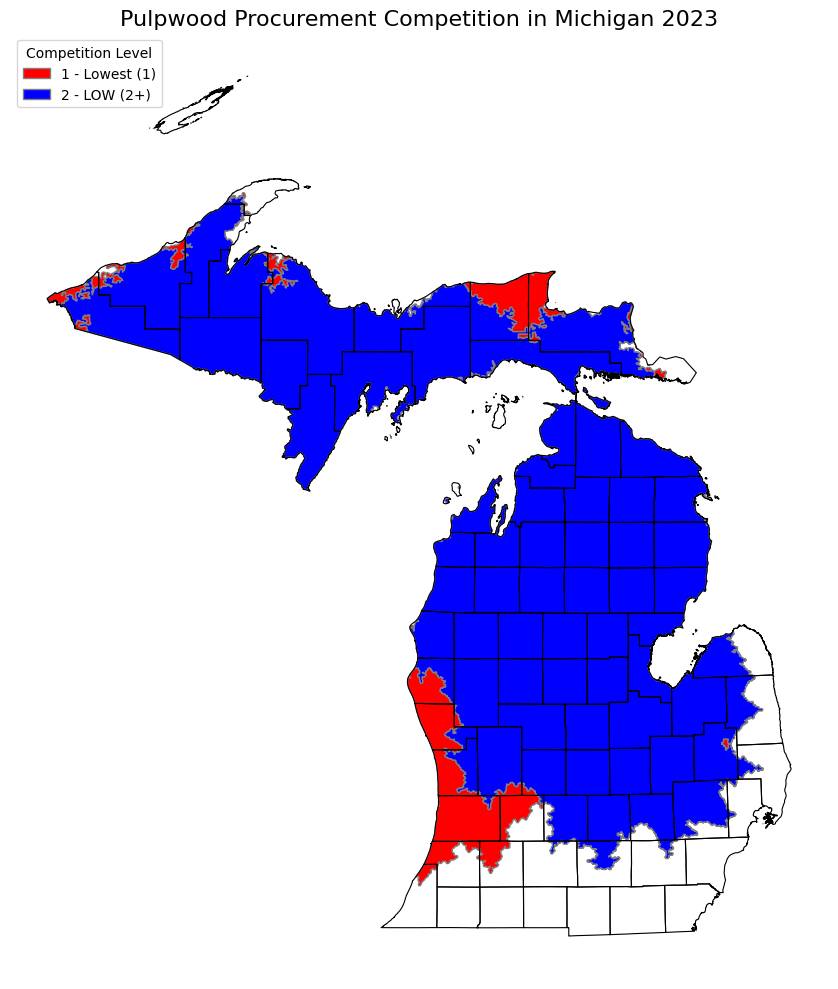

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"

lowest_fp = "Data/Competition Hotspots Data/pulpwood_2023_competition_lowest.shp"
low_fp    = "Data/Competition Hotspots Data/pulpwood_2023_competition_low.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_lowest = gpd.read_file(lowest_fp)
gdf_low = gpd.read_file(low_fp)

# --- Reproject to match base CRS ---
common_crs = gdf_michigan.crs
gdf_lowest = gdf_lowest.to_crs(common_crs)
gdf_low = gdf_low.to_crs(common_crs)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
gdf_lowest.plot(ax=ax, color='#FF0000', edgecolor='grey')  # Red
gdf_low.plot(ax=ax, color='#0000FF', edgecolor='grey')     # Blue

# Create legend
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - LOW (2+)')
]

# Add legend
ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# Final layout
plt.title("Pulpwood Procurement Competition in Michigan 2023", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


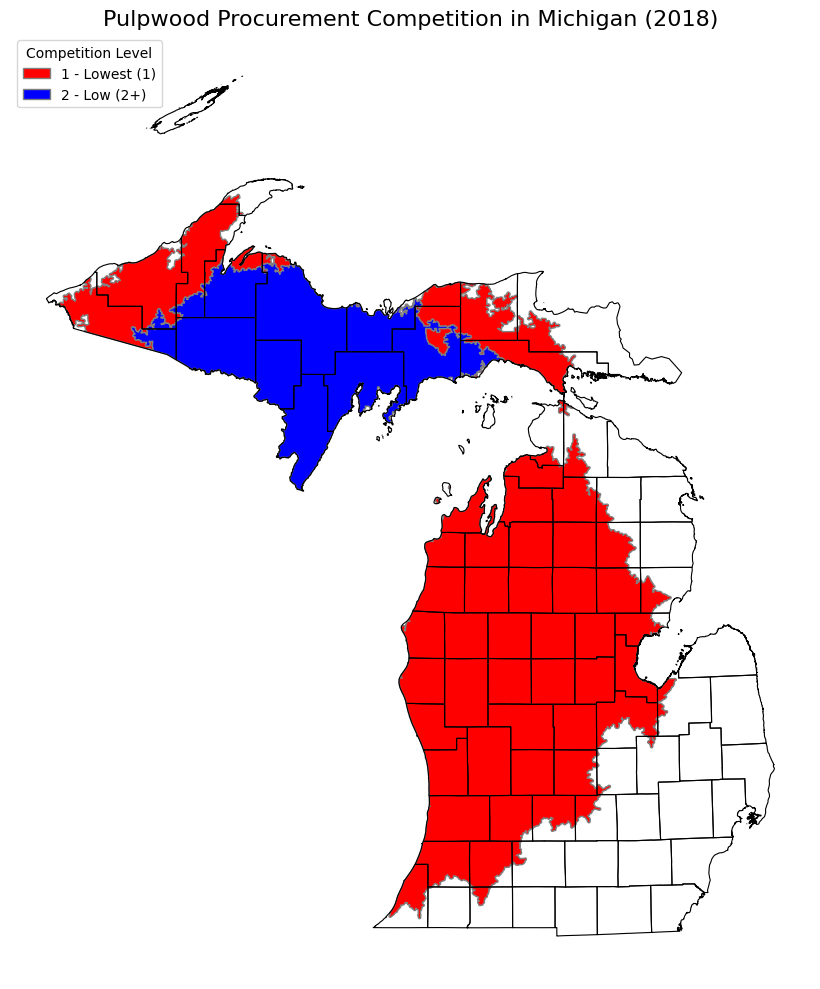

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
pulp_fp     = "Data/Competition Hotspots Data/pulpwood_2018.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_pulp = gpd.read_file(pulp_fp)

# --- Reproject to match base map CRS ---
if gdf_pulp.crs != gdf_michigan.crs:
    gdf_pulp = gdf_pulp.to_crs(gdf_michigan.crs)

# --- Define color mapping ---
color_map = {
    1: '#FF0000',  # Red - Lowest
    2: '#0000FF'   # Blue - Low
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_pulp[gdf_pulp['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Legend ---
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - Low (2+)')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Pulpwood Procurement Competition in Michigan (2018)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


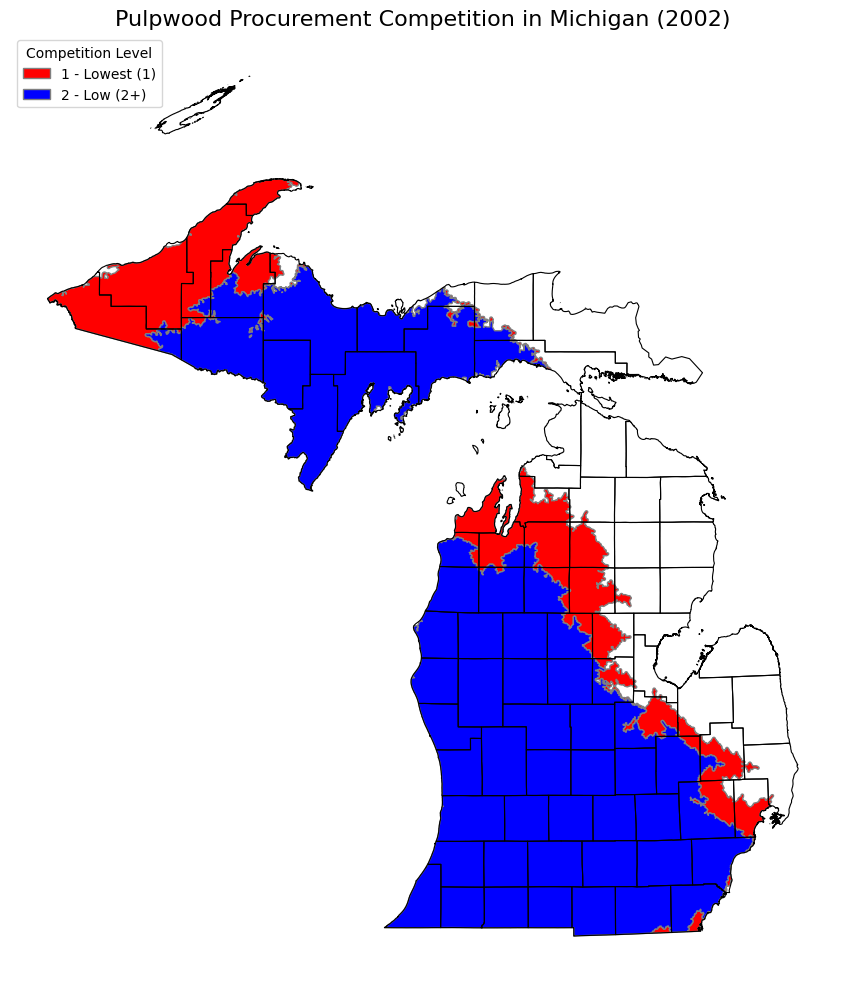

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
pulp_fp     = "Data/Competition Hotspots Data/pulpwood_2002.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_pulp = gpd.read_file(pulp_fp)

# --- Reproject if needed ---
if gdf_pulp.crs != gdf_michigan.crs:
    gdf_pulp = gdf_pulp.to_crs(gdf_michigan.crs)

# --- Define color mapping for competition classes ---
color_map = {
    1: '#FF0000',  # Red - Lowest
    2: '#0000FF'   # Blue - Low
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level based on gridcode
for level, color in color_map.items():
    subset = gdf_pulp[gdf_pulp['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - Low (2+)')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Pulpwood Procurement Competition in Michigan (2002)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


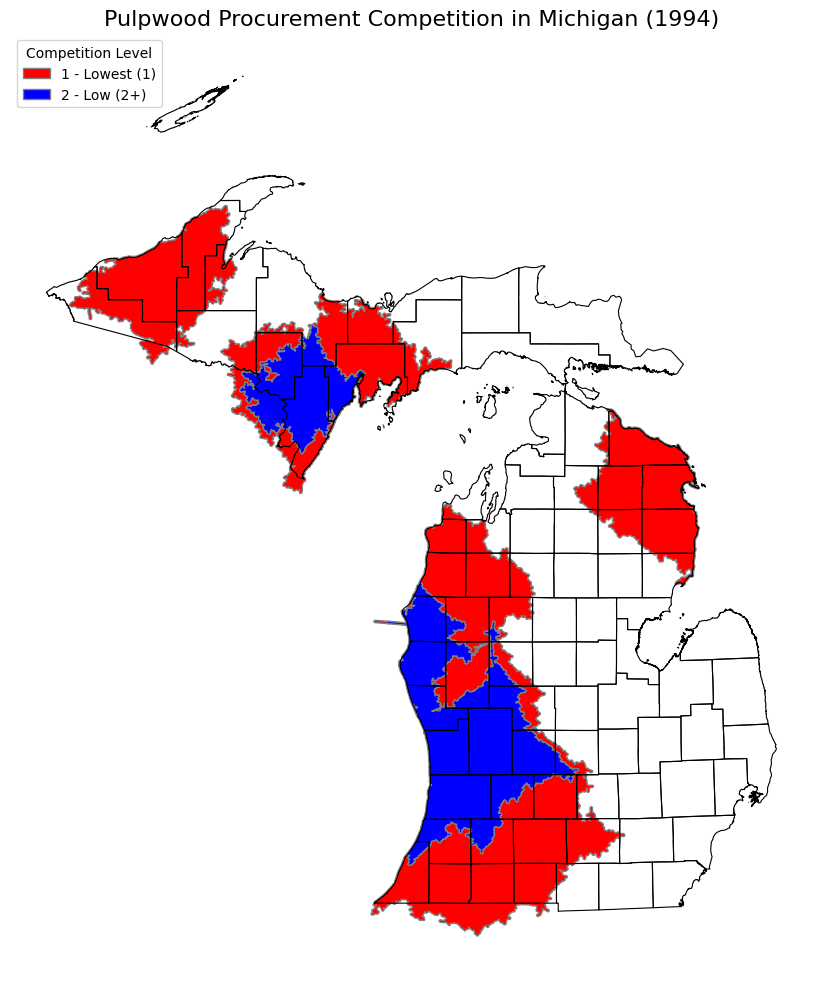

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = "Data/Competition Hotspots Data/Michigan_Counties.shp"
pulp1994_fp = "Data/Competition Hotspots Data/pulpwood_1994.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_pulp = gpd.read_file(pulp1994_fp)

# --- Reproject if needed ---
if gdf_pulp.crs != gdf_michigan.crs:
    gdf_pulp = gdf_pulp.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#FF0000',  # Red - Lowest
    2: '#0000FF'   # Blue - Low
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
for level, color in color_map.items():
    subset = gdf_pulp[gdf_pulp['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - Low (2+)')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Pulpwood Procurement Competition in Michigan (1994)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


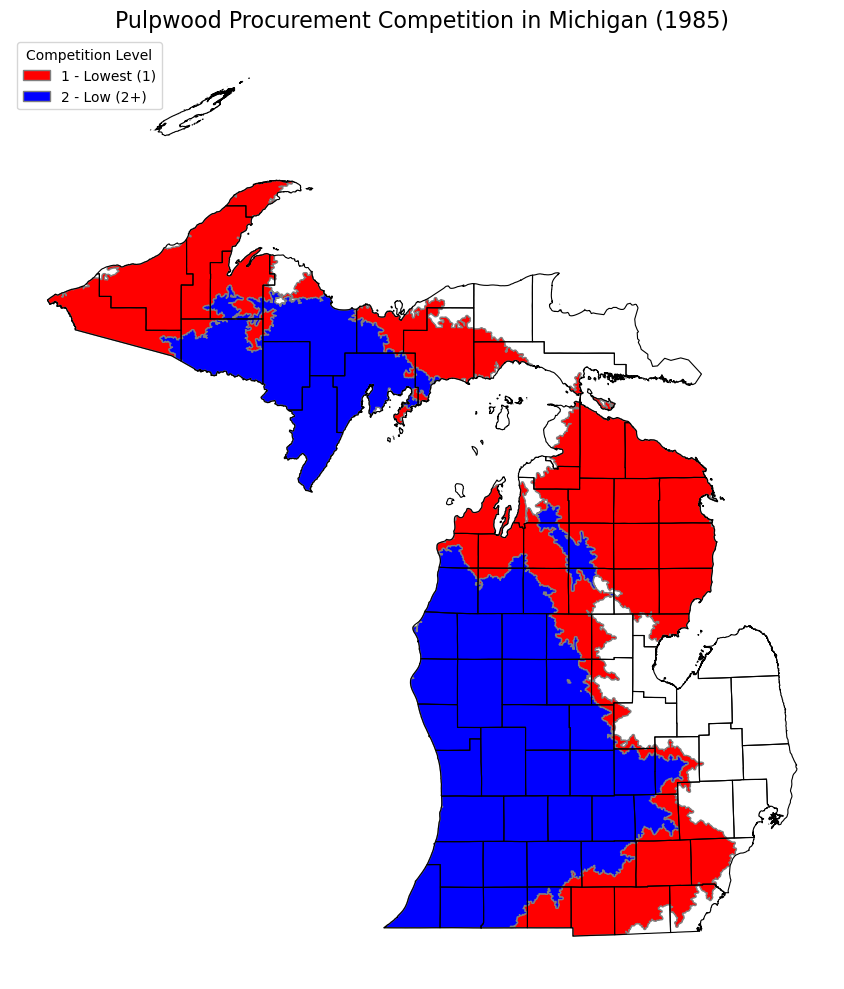

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- File paths ---
michigan_fp = r"\\for-stor.forestry.oregonstate.edu\home\I-K\khanalna\Documents\ArcGIS\Packages\HW3_0021d6\commondata\michigan_shp\Counties_(v17a).shp"
pulp1985_fp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\MSC thesis II\Shpfiles for hotspots\1985\pulp\pulpwood85.shp"

# --- Load data ---
gdf_michigan = gpd.read_file(michigan_fp)
gdf_pulp = gpd.read_file(pulp1985_fp)

# --- Reproject if needed ---
if gdf_pulp.crs != gdf_michigan.crs:
    gdf_pulp = gdf_pulp.to_crs(gdf_michigan.crs)

# --- Define color mapping for gridcode values ---
color_map = {
    1: '#FF0000',  # Red - Lowest
    2: '#0000FF'   # Blue - Low
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
gdf_michigan.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot each competition level
for level, color in color_map.items():
    subset = gdf_pulp[gdf_pulp['gridcode'] == level]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='grey')

# --- Manual legend ---
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - Low (2+)')
]

ax.legend(handles=legend_elements, title="Competition Level", loc='upper left', frameon=True)

# --- Final layout ---
plt.title("Pulpwood Procurement Competition in Michigan (1985)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


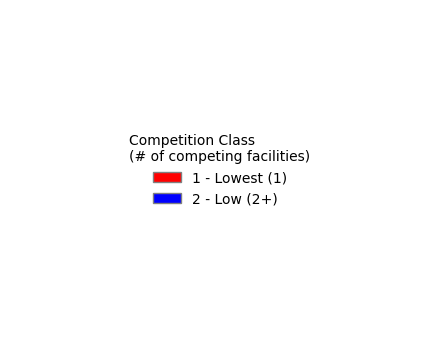

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Define legend elements ---
legend_elements = [
    Patch(facecolor='#FF0000', edgecolor='grey', label='1 - Lowest (1)'),
    Patch(facecolor='#0000FF', edgecolor='grey', label='2 - Low (2+)')
]

# --- Create a dummy figure for legend only ---
fig, ax = plt.subplots(figsize=(4.5, 3.5))
fig.patch.set_facecolor('white')
ax.axis('off')  # Hide axes

# --- Draw legend ---
ax.legend(
    handles=legend_elements,
    title='Competition Class\n(# of competing facilities)',
    loc='center',
    frameon=False
)

plt.tight_layout()
plt.show()
